# This is assignment12

# Name:PENG CIYUAN 

#  Student ID:2018220161

# Link:https://github.com/pcyyyy/assignment12.git

In [2]:
import numpy as np
import matplotlib.pyplot as plt

num     = 1001
std     = 5 

# x  : x-coordinate data
# y1 : (clean) y-coordinate data 
# y2 : (noisy) y-coordinate data

def fun(x):
 
	# f = np.sin(x) * (1 / (1 + np.exp(-x))) 
	f = np.abs(x) * np.sin(x)

	return f

n       = np.random.rand(num)
nn      = n - np.mean(n)
x       = np.linspace(-10,10,num)
y1      = fun(x) 			# clean points
y2      = y1 + nn * std		# noisy points

plt.plot(x, y1, 'b.', x, y2, 'k.')
plt.show()


<Figure size 640x480 with 1 Axes>

# Defining leastquare approximation function

In [3]:
def leastsquare(X,Y):
    xTx=np.dot(X.T,X)
    x=np.dot(np.linalg.inv(xTx),X.T)
    R=np.dot(x,Y)
    return(R)

# Defining lambda

In [4]:
lambda1 = 2**(-3)
lambda2 = 2**(0)
lambda3 = 2**(3)

# Defining the polynomial function

In [5]:
def poly(x,p,r):
    X=[]
    for i in range(len(x)):
        xi = []
        for j in range(p):
            xi.append(x[i]**j)
        X.append(xi)
    lam = []
    for i in range(p):
        lam.append(r)
    X = np.mat(X)
    lam = np.mat(lam)
    return X,lam

# Defining combined matrix

In [8]:
def matrix(X,lam):
    A = np.vstack((X,lam))
    A.reshape(-1,1)
    return A
y2 = np.concatenate((y2,[0])).reshape(-1,1)

In [10]:
X1,lam1 = poly(x,6,lambda1)
X2,lam2 = poly(x,10,lambda2)
X3,lam3 = poly(x,15,lambda3)
A1 = matrix(X1,lam1)
A2 = matrix(X2,lam2)
A3 = matrix(X3,lam3)

Q1 = leastsquare(A1,y2)
Q2 = leastsquare(A2,y2)
Q3 = leastsquare(A3,y2)

Y1 = X1.dot(Q1)
Y2 = X2.dot(Q2)
Y3 = X3.dot(Q3)

X11,lam2 = poly(x,6,lambda2)
X22,lam22 = poly(x,10,lambda2)
X33,lam33 = poly(x,15,lambda2)
A11 = matrix(X11,lam2)
A22 = matrix(X22,lam22)
A33 = matrix(X33,lam33)
Q11 = leastsquare(A11,y2)
Q22 = leastsquare(A22,y2)
Q33 = leastsquare(A33,y2)

Y11 = X1.dot(Q11)
Y22 = X2.dot(Q22)
Y33 = X3.dot(Q33)

# Ploting the polynomial curves with varying p

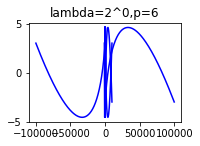

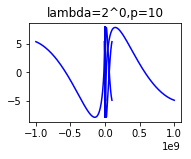

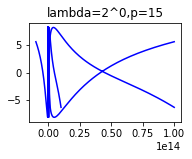

In [12]:
p1 = plt.subplot(2,2,1)
p1.set_title("lambda=2^0,p=6")
plt.plot(X11,Y11,'b')
plt.show()

p2 = plt.subplot(2,2,2)
p2.set_title("lambda=2^0,p=10")
plt.plot(X22,Y22,'b')
plt.show()

p3 = plt.subplot(2,2,3)
p3.set_title("lambda=2^0,p=15")
plt.plot(X33,Y33,'b')
plt.show()

# Ploting the polynomial curves with varying lambda

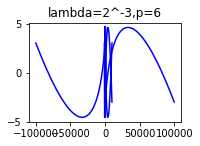

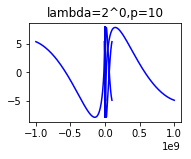

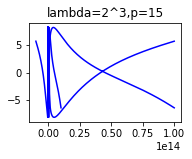

In [13]:
p1 = plt.subplot(2,2,1)
p1.set_title("lambda=2^-3,p=6")
plt.plot(X1,Y1,'b')
plt.show()

p2 = plt.subplot(2,2,2)
p2.set_title("lambda=2^0,p=10")
plt.plot(X2,Y2,'b')
plt.show()

p3 = plt.subplot(2,2,3)
p3.set_title("lambda=2^3,p=15")
plt.plot(X3,Y3,'b')
plt.show()

#  the energy 

In [18]:
e1 = (A1.dot(Q1))-y2
e2 = (A2.dot(Q2))-y2
e3 = (A3.dot(Q3))-y2
print(e1)
print(e2)
print(e3)


[[-2.00077343]
 [-0.86248116]
 [-4.57298737]
 ...
 [ 4.53917992]
 [ 2.60690328]
 [-0.1810909 ]]
[[ 0.33684803]
 [ 1.55755193]
 [-2.08232248]
 ...
 [ 2.49638632]
 [ 0.66438368]
 [ 1.58683413]]
[[ 0.65303909]
 [ 1.78067258]
 [-1.94166705]
 ...
 [ 1.32188738]
 [-0.83060236]
 [ 5.1673697 ]]
